In [1]:
#!pip install sklearn
import sklearn
import pandas as pd
import numpy as np

In [2]:
sklearn.__version__

'0.22.1'

In [3]:
data = pd.read_csv("BackOrders.csv")
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


In [4]:
data.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
61584,1397275,6,8.0,0,24,24,24,0,7,9,...,0,0.98,0.98,0,No,No,No,Yes,No,No
61585,3072139,130,2.0,0,40,80,140,18,108,230,...,0,0.51,0.28,0,No,No,No,Yes,No,No
61586,1909363,135,9.0,0,0,0,0,10,40,65,...,0,1.00,0.99,0,No,No,Yes,Yes,No,No
61587,1845783,63,NaN,0,0,0,0,452,1715,3425,...,0,-99.00,-99.00,1,No,No,No,No,No,Yes
61588,1200539,0,2.0,0,8,8,8,0,1,1,...,0,0.79,0.78,0,Yes,No,No,Yes,No,Yes


In [5]:
data.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,6.158900e+04,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,4.196427e+02,43.087256,1.605400,-6.264182,-5.863664,1.205361
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,1.269858e+04,959.614135,42.309229,25.537906,24.844514,29.981155
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.620000,0.640000,0.000000
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,6.000000e+00,0.000000,0.000000,0.820000,0.800000,0.000000
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,5.100000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.284895e+06,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,2.631590e+06,192978.000000,7392.000000,1.000000,1.000000,2999.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61589 entries, 0 to 61588
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                61589 non-null  int64  
 1   national_inv       61589 non-null  int64  
 2   lead_time          58186 non-null  float64
 3   in_transit_qty     61589 non-null  int64  
 4   forecast_3_month   61589 non-null  int64  
 5   forecast_6_month   61589 non-null  int64  
 6   forecast_9_month   61589 non-null  int64  
 7   sales_1_month      61589 non-null  int64  
 8   sales_3_month      61589 non-null  int64  
 9   sales_6_month      61589 non-null  int64  
 10  sales_9_month      61589 non-null  int64  
 11  min_bank           61589 non-null  int64  
 12  potential_issue    61589 non-null  object 
 13  pieces_past_due    61589 non-null  int64  
 14  perf_6_month_avg   61589 non-null  float64
 15  perf_12_month_avg  61589 non-null  float64
 16  local_bo_qty       615

In [7]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

sku is index, hence we can ignore it

In [8]:
len(pd.unique(data.sku)),len(data.sku)

(61589, 61589)

In [9]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

### No scaling needed

## dropping null

In [10]:
data.isnull().sum()

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [11]:
data.dropna(axis=0, inplace = True)

In [12]:
data.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [13]:
data.drop('sku',axis=1,inplace=True)

In [14]:
data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,58186.000000,58186.000000,58186.000000,5.818600e+04,5.818600e+04,5.818600e+04,58186.000000,58186.000000,5.818600e+04,5.818600e+04,58186.000000,58186.000000,58186.000000,58186.000000,58186.000000
mean,281.245987,7.559619,31.338123,1.780929e+02,3.313014e+02,4.771002e+02,45.347575,153.180610,2.888281e+02,4.289081e+02,43.424415,1.696766,-0.840541,-0.416599,1.259977
std,4321.329801,6.498952,814.665767,5.438487e+03,1.005456e+04,1.460902e+04,1408.074630,5360.176586,9.101474e+03,1.304183e+04,979.291691,43.525034,12.567315,10.786604,30.819641
min,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.680000,0.670000,0.000000
50%,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,2.000000,4.000000e+00,6.000000e+00,0.000000,0.000000,0.830000,0.820000,0.000000
75%,55.000000,8.000000,0.000000,1.400000e+01,2.800000e+01,4.200000e+01,6.000000,18.000000,3.600000e+01,5.400000e+01,4.000000,0.000000,0.970000,0.950000,0.000000
max,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,2.631590e+06,192978.000000,7392.000000,1.000000,1.000000,2999.000000


In [15]:
data.nunique()

national_inv         2756
lead_time              28
in_transit_qty        894
forecast_3_month     1614
forecast_6_month     2185
forecast_9_month     2654
sales_1_month        1066
sales_3_month        1887
sales_6_month        2627
sales_9_month        3157
min_bank             1068
potential_issue         2
pieces_past_due       190
perf_6_month_avg      102
perf_12_month_avg     102
local_bo_qty          200
deck_risk               2
oe_constraint           2
ppap_risk               2
stop_auto_buy           2
rev_stop                2
went_on_backorder       2
dtype: int64

### Getting categorical

* Either

In [16]:
data.describe(include="object").columns

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [17]:
data[data.describe(include="object").columns]

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,No,Yes,No,No,Yes,No,No
2,No,No,No,No,Yes,No,No
3,No,Yes,No,No,Yes,No,No
4,No,No,No,No,Yes,No,No
5,No,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...
61583,No,Yes,No,No,Yes,No,No
61584,No,No,No,No,Yes,No,No
61585,No,No,No,No,Yes,No,No
61586,No,No,No,Yes,Yes,No,No


* Or

In [18]:
cat_cols = list(data.select_dtypes("object").columns)

In [19]:
for i in cat_cols:
    data[i] = data[i].astype("category")

In [20]:
data.dtypes

national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

## Or to avoid for loop

In [21]:
data[cat_cols] = data[cat_cols].astype("category")

In [22]:
data.dtypes

national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

In [23]:
dum_cols = cat_cols[:len(cat_cols)-1]

In [24]:
data = pd.get_dummies(data,columns=dum_cols,prefix=dum_cols,prefix_sep="_",drop_first=True)

In [25]:
data

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,went_on_backorder,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
1,7,2.0,0,0,0,0,0,0,0,0,...,0.50,0.28,0,No,0,1,0,0,1,0
2,258,15.0,10,10,77,184,46,132,256,365,...,0.54,0.70,0,No,0,0,0,0,1,0
3,46,2.0,0,0,0,0,1,2,6,9,...,0.75,0.90,0,No,0,1,0,0,1,0
4,2,2.0,0,4,6,10,2,2,5,6,...,0.97,0.92,0,No,0,0,0,0,1,0
5,297,12.0,0,0,0,0,5,6,44,57,...,0.58,0.75,0,No,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61583,80,2.0,0,0,0,0,7,8,9,15,...,1.00,0.91,0,No,0,1,0,0,1,0
61584,6,8.0,0,24,24,24,0,7,9,12,...,0.98,0.98,0,No,0,0,0,0,1,0
61585,130,2.0,0,40,80,140,18,108,230,317,...,0.51,0.28,0,No,0,0,0,0,1,0
61586,135,9.0,0,0,0,0,10,40,65,89,...,1.00,0.99,0,No,0,0,0,1,1,0


In [26]:
X, y = data.drop("went_on_backorder",axis=1),data.went_on_backorder

In [27]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

## Sklearn from this point

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 123)

In [30]:
X_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
24039,479,8.0,0,0,0,0,0,0,0,0,...,0,0.83,0.91,0,0,0,0,1,1,0
12800,3,12.0,0,36,46,56,12,23,39,56,...,0,0.82,0.79,0,0,0,0,1,1,0
59501,1,5.0,0,2,3,5,2,2,4,6,...,0,0.99,0.97,0,0,0,0,0,1,0
35410,1,4.0,0,0,0,0,0,0,0,0,...,0,0.73,0.78,0,0,0,0,1,1,0
27604,65,4.0,63,167,309,465,44,180,321,509,...,0,0.96,0.85,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57535,53672,4.0,31750,56000,140000,196000,21071,66174,127006,185983,...,0,0.98,0.96,0,0,0,0,0,1,0
18760,4,12.0,0,0,2,4,1,1,4,6,...,0,0.78,0.78,0,0,0,0,1,1,0
29635,3,2.0,0,4,8,12,0,4,6,12,...,0,0.98,0.99,0,0,0,0,0,1,0
16647,21,2.0,0,0,0,0,5,10,15,25,...,0,0.89,0.93,0,0,0,0,0,1,0


In [31]:
X.shape,X_train.shape,X_test.shape

((58186, 21), (40730, 21), (17456, 21))

In [32]:
y.shape,y_train.shape,y_test.shape

((58186,), (40730,), (17456,))

In [33]:
y_train.value_counts()

No     33067
Yes     7663
Name: went_on_backorder, dtype: int64

In [34]:
y_test.value_counts()

No     14150
Yes     3306
Name: went_on_backorder, dtype: int64

### train_test_split gives stratified sampling, when the y is categorical

In [35]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt

In [36]:
dt_model = DecisionTreeClassifier()

In [37]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [43]:
confusion_matrix(y_true=y_train,y_pred = y_train_pred)

array([[33047,    20],
       [   69,  7594]], dtype=int64)

In [44]:
confusion_matrix(y_true=y_test,y_pred = y_test_pred)

array([[13207,   943],
       [  781,  2525]], dtype=int64)

In [46]:
accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)

(0.9978148784679597, 0.9012373968835931)

In [47]:
dt_model.get_depth()

26

In [55]:
print(recall_score(y_train,y_train_pred,pos_label='Yes'))
print(recall_score(y_test,y_test_pred,pos_label='Yes'))

0.9909956935925878
0.763762855414398


In [56]:
dt_model.feature_importances_

array([3.11700973e-01, 3.23357963e-02, 3.20324735e-02, 9.16975041e-02,
       3.05407494e-02, 1.09659395e-01, 6.85334028e-02, 3.65887382e-02,
       5.05082782e-02, 4.49807985e-02, 3.09045771e-02, 7.05373566e-03,
       5.63559254e-02, 6.30896133e-02, 1.05871156e-02, 1.01710181e-04,
       1.14986363e-02, 0.00000000e+00, 9.62105621e-03, 2.20952134e-03,
       0.00000000e+00])

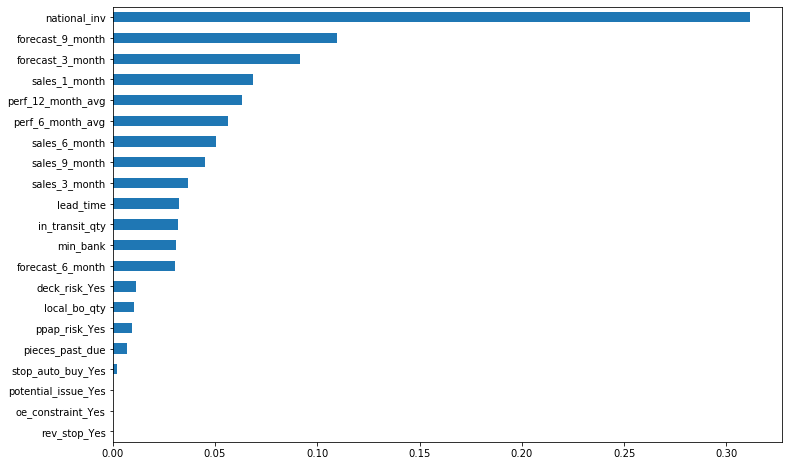

In [80]:
plt.figure(figsize=(12,8))
pd.Series(dt_model.feature_importances_,X.columns).sort_values().plot(kind="barh")
plt.show()

In [81]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[None,10,15,20,25],"min_samples_split":[None,2,10,20,30]}

In [85]:
dt_cv_model = DecisionTreeClassifier()
gs_object = GridSearchCV(dt_cv_model,param_grid,verbose=15,n_jobs=-1)

In [86]:
gs_object.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   19.9s
[Paralle

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [88]:
gs_object.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__presort': 'deprecated',
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'iid': 'deprecated'